# **Analytics-Driven Early Warning System**

# **Loading of Dataset**

In [4]:
import pandas as pd
df = pd.read_csv("customer_usage.csv")
df.head()


,customer_id,region,city,monthly_usage_kwh,peak_usage_kwh,contract_type,tenure_months,avg_outage_hours,service_tickets,last_bill_amount,payment_delay_days,churn
0,C00001,North,Delhi,250,355,Fixed,33,6.43,4,3338,15,0
1,C00002,West,Patna,535,502,Fixed,20,3.78,5,3561,12,0
2,C00003,South,Patna,694,1218,Fixed,38,5.22,2,4789,6,0
3,C00004,North,Gurgaon,378,545,Variable,5,0.53,1,3502,13,0
4,C00005,West,Delhi,364,495,Variable,5,2.88,6,2721,1,0


# **Summary of Dataset**

In [5]:
df.shape
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   region              5000 non-null   object 
 2   city                5000 non-null   object 
 3   monthly_usage_kwh   5000 non-null   int64  
 4   peak_usage_kwh      5000 non-null   int64  
 5   contract_type       5000 non-null   object 
 6   tenure_months       5000 non-null   int64  
 7   avg_outage_hours    5000 non-null   float64
 8   service_tickets     5000 non-null   int64  
 9   last_bill_amount    5000 non-null   int64  
 10  payment_delay_days  5000 non-null   int64  
 11  churn               5000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 468.9+ KB


,0
customer_id,0
region,0
city,0
monthly_usage_kwh,0
peak_usage_kwh,0
contract_type,0
tenure_months,0
avg_outage_hours,0
service_tickets,0
last_bill_amount,0


#**Seeing how Churn is being distributed in the dataset**

In [10]:
churned = df[df['churn'] == 1]
not_churned = df[df['churn'] == 0]
df['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,70.32
1,29.68


# **Churn on the basis of Payment Delay Days**

In [12]:
df.groupby('churn')['payment_delay_days'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,9.488055,5.782411,0.0,5.0,10.0,14.0,19.0
1,1484.0,9.633423,5.702833,0.0,5.0,10.0,15.0,19.0


# **Churn on the basis of Last Bill Amount**

In [13]:
df.groupby('churn')['last_bill_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,3990.355802,1434.103635,1506.0,2794.00,3976.5,5235.00,6499.0
1,1484.0,3992.833558,1436.235411,1513.0,2727.25,4014.0,5223.25,6498.0


# **Seeing Churn Relationship with other factors**

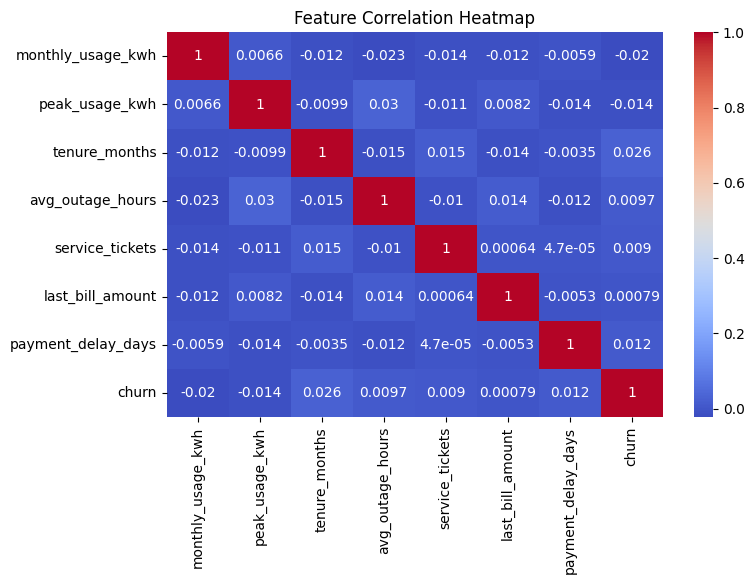

In [14]:
numerical_cols = [
    'monthly_usage_kwh','peak_usage_kwh','tenure_months','avg_outage_hours','service_tickets', 'last_bill_amount',
    'payment_delay_days',
    'churn'
]
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Churn on the basis of tenure months**

In [15]:
df.groupby('churn')['tenure_months'].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,23.835324,13.761323,1.0,12.0,24.0,36.0,47.0
1,1484.0,24.601752,13.323852,1.0,13.0,25.0,36.0,47.0


# **Churn on the basis of contract type**

In [16]:
pd.crosstab(df['contract_type'], df['churn'], normalize='index') * 100


churn,0,1
contract_type,,
Fixed,69.960630,30.039370
Variable,70.691057,29.308943


# **Churn on the basis of Service Tickets**

In [18]:
df.groupby('churn')['service_tickets'].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,3.482935,2.278103,0.0,1.0,3.0,5.0,7.0
1,1484.0,3.527628,2.249727,0.0,2.0,4.0,5.0,7.0


# **Churn on the basis of outage Hours**

In [19]:
df.groupby('churn')['avg_outage_hours'].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,3.51161,2.011088,0.00,1.7400,3.530,5.27,7.00
1,1484.0,3.55473,2.055166,0.01,1.7975,3.595,5.34,6.99


# **Churn on the basis of peak usage in kwh**

In [20]:
df.groupby('churn')['peak_usage_kwh'].describe()


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,3516.0,804.351536,289.070846,300.0,557.75,805.0,1053.0,1299.0
1,1484.0,795.489892,292.514088,300.0,540.00,783.0,1053.5,1299.0


# **Churn on the basis of region**

In [21]:
churn_by_region = (
    pd.crosstab(df['region'], df['churn'], normalize='index') * 100
)

churn_by_region


churn,0,1
region,,
East,69.298952,30.701048
North,70.864198,29.135802
South,70.456365,29.543635
West,70.656371,29.343629


# **Counting no.of customers for every city**

In [23]:
df['city'].value_counts()


,count
city,
Patna,546
Mumbai,533
Gurgaon,526
Delhi,511
Pune,502
Chennai,493
Kolkata,492
Noida,471
Hyderabad,470


# **Churn on the basis of City**

In [24]:
churn_by_city = (
    pd.crosstab(df['city'], df['churn'], normalize='index') * 100)

churn_by_city.columns = ['No Churn (%)', 'Churn (%)']
churn_by_city


,No Churn (%),Churn (%)
city,,
Bangalore,70.175439,29.824561
Chennai,66.937120,33.062880
Delhi,71.428571,28.571429
Gurgaon,71.673004,28.326996
Hyderabad,68.085106,31.914894
Kolkata,68.699187,31.300813
Mumbai,71.669794,28.330206
Noida,71.549894,28.450106
Patna,71.428571,28.571429


# **TOP 10 Cities with highest churn rate**



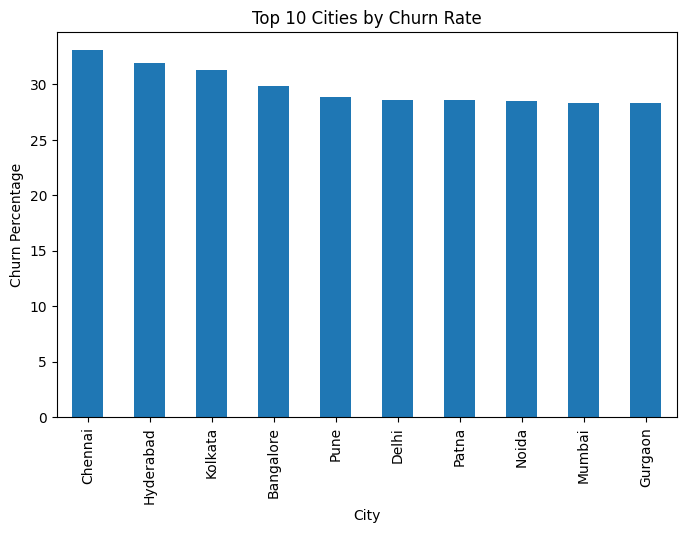

In [25]:
top_cities = churn_by_city.sort_values('Churn (%)', ascending=False).head(10)

top_cities['Churn (%)'].plot(kind='bar')
plt.title("Top 10 Cities by Churn Rate")
plt.ylabel("Churn Percentage")
plt.xlabel("City")
plt.show()


#**Converted raw numeric columns into risk indicators**

In [40]:
df['high_payment_delay'] = (df['payment_delay_days'] > 15).astype(int)
df['frequent_service_issues'] = (df['service_tickets'] >= 4).astype(int)
df['high_outage'] = (df['avg_outage_hours'] > 5).astype(int)
df['high_peak_usage'] = (
    df['peak_usage_kwh'] > df['peak_usage_kwh'].quantile(0.75)
).astype(int)
df['low_tenure'] = (df['tenure_months'] < 12).astype(int)


In [54]:
df.head(15)

,customer_id,region,city,monthly_usage_kwh,peak_usage_kwh,contract_type,tenure_months,avg_outage_hours,service_tickets,last_bill_amount,payment_delay_days,churn,high_payment_delay,frequent_service_issues,high_outage,high_peak_usage,low_tenure,risk_factor_count,operational_risk_score,risk_bucket,operational_burden
0,C00001,North,Delhi,250,0.055055,Fixed,33,0.918571,0.571429,3338,0.789474,0,0,0,0,0,0,2,60.299597,High Risk,1.490551
1,C00002,West,Patna,535,0.202202,Fixed,20,0.540000,0.714286,3561,0.631579,0,0,0,0,0,0,1,55.219984,Medium Risk,1.256308
2,C00003,South,Patna,694,0.918919,Fixed,38,0.745714,0.285714,4789,0.315789,0,0,0,0,1,0,2,51.337777,Medium Risk,1.040618
3,C00004,North,Gurgaon,378,0.245245,Variable,5,0.075714,0.142857,3502,0.684211,0,0,0,0,0,1,1,31.231221,Low Risk,0.221024
4,C00005,West,Delhi,364,0.195195,Variable,5,0.411429,0.857143,2721,0.052632,0,0,0,0,0,1,2,39.425708,Low Risk,1.270523
5,C00006,West,Mumbai,346,0.484484,Fixed,10,0.080000,0.285714,2215,0.368421,0,0,0,0,0,1,1,30.913750,Low Risk,0.370559
6,C00007,West,Patna,822,0.499499,Fixed,8,0.111429,0.285714,6422,0.157895,0,0,0,0,0,1,1,25.526832,Low Risk,0.402138
7,C00008,West,Kolkata,893,0.424424,Variable,1,0.925714,0.285714,5512,1.000000,0,0,0,0,0,1,3,65.574203,High Risk,1.215673
8,C00009,South,Delhi,584,0.744745,Variable,3,0.368571,0.857143,2086,0.842105,0,0,0,0,0,1,3,73.243767,High Risk,1.233162
9,C00010,West,Bangalore,525,0.751752,Variable,4,0.304286,0.142857,6151,0.631579,0,0,0,0,0,1,1,44.353832,Medium Risk,0.454660


# **Scaling for each factor**

In [41]:
severity_cols = [
    'payment_delay_days',
    'service_tickets',
    'avg_outage_hours',
    'peak_usage_kwh'
]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[severity_cols] = scaler.fit_transform(df[severity_cols])


# **Customer Risk Score**

In [42]:
df_scaled['risk_score'] = (
    df_scaled['payment_delay_days'] * 30 +
    df_scaled['service_tickets'] * 30 +
    df_scaled['avg_outage_hours'] * 20 +
    df_scaled['peak_usage_kwh'] * 20
)


# **Risk Category**

In [43]:
df_scaled['risk_bucket'] = pd.qcut(
    df_scaled['risk_score'],
    q=3,
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)


#**Risk Factors**

In [44]:
driver_cols = [
    'high_payment_delay',
    'frequent_service_issues',
    'high_outage',
    'high_peak_usage',
    'low_tenure'
]

def get_risk_drivers(row):
    drivers = []
    if row['high_payment_delay']: drivers.append('Payment Delay')
    if row['frequent_service_issues']: drivers.append('Service Tickets')
    if row['high_outage']: drivers.append('Outages')
    if row['high_peak_usage']: drivers.append('High Usage')
    if row['low_tenure']: drivers.append('Low Tenure')
    return ', '.join(drivers) if drivers else 'None'

df_scaled['risk_drivers'] = df_scaled.apply(get_risk_drivers, axis=1)


In [45]:
pd.crosstab(
    df_scaled['risk_bucket'],
    df_scaled['churn'],
    normalize='index'
) * 100


churn,0,1
risk_bucket,,
Low Risk,71.865627,28.134373
Medium Risk,68.667467,31.332533
High Risk,70.425915,29.574085


In [47]:
risk_explanation_table = df_scaled[
    [
        'customer_id',
        'region',
        'city',
        'risk_score',
        'risk_bucket',
        'risk_drivers',
        'churn'
    ]
].sort_values('risk_score', ascending=False)


# **Final Table**

In [48]:
risk_explanation_table.head(10)


,customer_id,region,city,risk_score,risk_bucket,risk_drivers,churn
4674,C04675,East,Chennai,94.853657,High Risk,"High Usage, Low Tenure",0
364,C00365,North,Hyderabad,93.496582,High Risk,High Usage,1
2397,C02398,North,Gurgaon,93.329101,High Risk,None,0
1824,C01825,North,Noida,91.810668,High Risk,High Usage,0
1848,C01849,East,Chennai,91.546006,High Risk,High Usage,0
3718,C03719,West,Patna,91.055287,High Risk,None,0
1913,C01914,North,Kolkata,90.844187,High Risk,"High Usage, Low Tenure",1
1441,C01442,North,Pune,89.974526,High Risk,"High Usage, Low Tenure",0
2783,C02784,East,Gurgaon,89.832953,High Risk,High Usage,1
2614,C02615,East,Gurgaon,89.493179,High Risk,High Usage,1


# **Used Logistic Regression to see what operational factors drive that risk**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd


#**Selecting Churn as Target feature**

In [50]:
features = [
    'payment_delay_days',
    'service_tickets',
    'avg_outage_hours',
    'peak_usage_kwh',
    'tenure_months'
]

X = df[features]
y = df['churn']


# **Scaling Features**

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Training the Logistic Model**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **Seeing the cofficients**

In [53]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
4,tenure_months,0.059728
0,payment_delay_days,0.028603
2,avg_outage_hours,0.010701
1,service_tickets,-0.005700
3,peak_usage_kwh,-0.025322


In [78]:
coef_df = pd.DataFrame({
    'feature': features,
    'coef': abs(log_reg.coef_[0])
})


In [79]:
coef_df['weight'] = coef_df['coef'] / coef_df['coef'].sum() * 100
coef_df


,feature,coef,weight
0,payment_delay_days,0.028603,21.993287
1,service_tickets,0.005700,4.382805
2,avg_outage_hours,0.010701,8.227891
3,peak_usage_kwh,0.025322,19.470684
4,tenure_months,0.059728,45.925333


In [80]:
df_scaled['risk_score_lr'] = (
    df_scaled['payment_delay_days'] * 22 +
    df_scaled['avg_outage_hours'] * 8.22 +
    df_scaled['service_tickets'] * 4.3 +
    df_scaled['peak_usage_kwh'] * 19.4
)


#**Using Gradient Descent Model for calculation Risk Score**

In [55]:
features = [
    'payment_delay_days',
    'service_tickets',
    'avg_outage_hours',
    'peak_usage_kwh',
    'tenure_months'
]

X = df[features]
y = df['churn']


# **Training the model**

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

#**Calculation of risk score**

In [58]:
df['ml_risk_score'] = gb_model.predict_proba(X)[:, 1] * 100


In [74]:
y_test_prob = gb_model.predict_proba(X_test)[:, 1]

y_test_pred = gb_model.predict(X_test)


In [75]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_test_prob)
roc_auc


np.float64(0.45867877446824823)

#**Model Performance**

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.70      0.99      0.82       703
           1       0.22      0.01      0.01       297

    accuracy                           0.70      1000
   macro avg       0.46      0.50      0.42      1000
weighted avg       0.56      0.70      0.58      1000



In [77]:
df['ml_risk_score']

,ml_risk_score
0,33.013952
1,37.446140
2,35.800719
3,37.723974
4,31.913102
...,...
4995,30.702214
4996,33.541701
4997,31.153222
4998,32.647545


<Axes: >

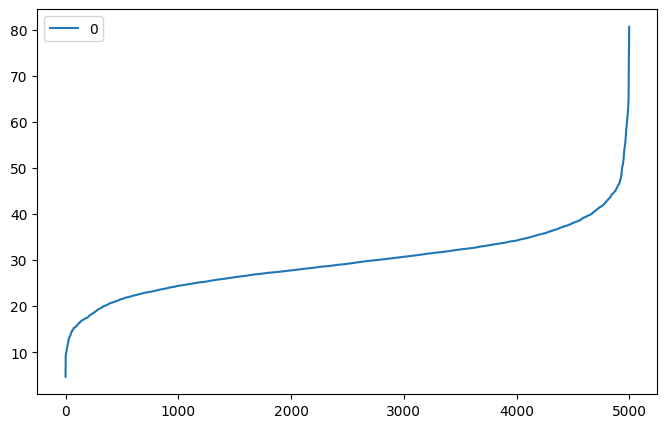

In [66]:
pd.DataFrame(sorted(df['ml_risk_score'])).plot()